#Imports, Settings and Reading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
print(os.getcwd())

/content


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nidhicodes4045/datascience442/refs/heads/main/merged_data.csv")

df = df.drop(['Unnamed: 0'], axis = 1).copy() # Dropping useless column

#Selection of Data

To determine what may have a meaningful impact on the number of people within a county that have low accessibility to a supermarket, I'll select a small subset of columns that I believe may have a relationship with that variable and do some analysis.

For the main variable of interest, I selected `Low Access Numbers.People.10 Miles` , which is a column from the original dataset that represents county population count at least 10 miles from a supermarket. I believe that it will be a good indicator variable to determine whether a county has supermarket accecibility issues since 10 miles is a somewhat long distance.

As for the other variables, I'll be selecting `State` , `Vehicle Access.10 Miles` , `Sales.Retail Sales` and `Income.Median Household Income`. My reasoning for selecting these columns is because I believe that they'll have some kind of relationship with my variable of interest and will be interesting to explore.

In [ ]:
# Selects 'State', 'Low Access Numbers.People.10 Miles', 'Vehicle Access.10 Miles', 'Sales.Retail Sales', 'Income.Median Houseold Income' from the orginal dataset
%%time
df = df[['State', 'Low Access Numbers.People.10 Miles', 'Vehicle Access.10 Miles', 'Sales.Retail Sales', 'Income.Median Houseold Income']]

CPU times: user 2.76 ms, sys: 0 ns, total: 2.76 ms
Wall time: 8.21 ms


# Simple Understanding of the Data


*   Dataframe `shape` and `columns`
*   `head` and `tail`
*   Column data `info`
*   Summary statistics
*   Unique values count







In [ ]:
df.shape

(3138, 5)

In [ ]:
df.columns

Index(['State', 'Low Access Numbers.People.10 Miles',
       'Vehicle Access.10 Miles', 'Sales.Retail Sales',
       'Income.Median Houseold Income'],
      dtype='object')

In [ ]:
df.head()

,State,Low Access Numbers.People.10 Miles,Vehicle Access.10 Miles,Sales.Retail Sales,Income.Median Houseold Income
0,al,5119,222.0000,607854.0000,58731
1,al,2308,32.0000,3145789.0000,58320


In [ ]:
df.tail()

,State,Low Access Numbers.People.10 Miles,Vehicle Access.10 Miles,Sales.Retail Sales,Income.Median Houseold Income
3133,wy,2548,18.0000,921443.0000,74843
3134,wy,1677,0.0000,512610.0000,84678
3135,wy,726,9.0000,389868.0000,63403
3136,wy,902,7.0000,95392.0000,54158
3137,wy,840,2.0000,76514.0000,57031


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               3138 non-null   object 
 1   Low Access Numbers.People.10 Miles  3138 non-null   int64  
 2   Vehicle Access.10 Miles             3138 non-null   float64
 3   Sales.Retail Sales                  3138 non-null   float64
 4   Income.Median Houseold Income       3138 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 122.7+ KB


In [ ]:
df.describe()

,Low Access Numbers.People.10 Miles,Vehicle Access.10 Miles,Sales.Retail Sales,Income.Median Houseold Income
count,3138.0000,3138.0000,3138.0000,3138.0000
mean,1634.5271,28.2718,1347125.4324,53483.6574
std,2385.7900,78.1238,4472255.3870,14183.6740
min,0.0000,0.0000,576.0000,21504.0000
25%,173.2500,2.0000,94782.5000,44173.0000
50%,954.0000,7.0000,275248.0000,51770.0000
75%,2284.0000,30.0000,834925.0000,59867.2500
max,37500.0000,1826.0000,121389378.0000,142299.0000


In [ ]:
# Prints the unique values for the column State
df['State'].value_counts()

,count
State,
tx,254
ga,159
va,133
ky,120
mo,115
ks,105
il,102
nc,100
ia,99


It seems like some states are far more represented than others. Its good to make a note.

# Exploratory Data Analysis

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis




## Univariate Analysis

---

*   Explore the distribution of each variable





In [ ]:
df.head()

,State,Low Access Numbers.People.10 Miles,Vehicle Access.10 Miles,Sales.Retail Sales,Income.Median Houseold Income
0,al,5119,222.0000,607854.0000,58731
1,al,2308,32.0000,3145789.0000,58320
2,al,4643,201.0000,206477.0000,32525
3,al,365,0.0000,118871.0000,47542
4,al,0,0.0000,298745.0000,49358


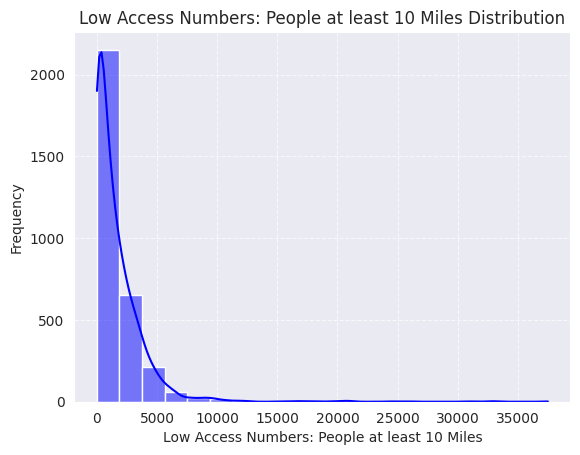

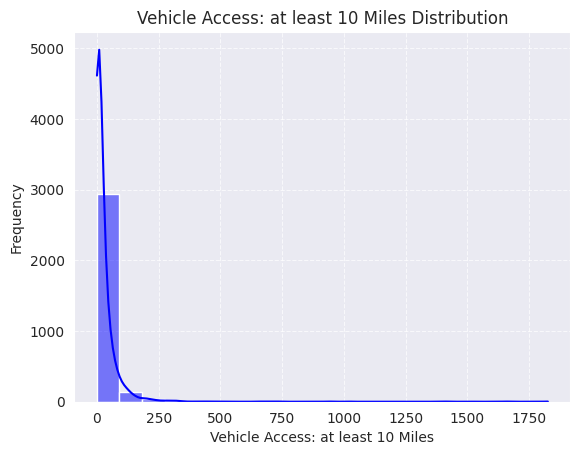

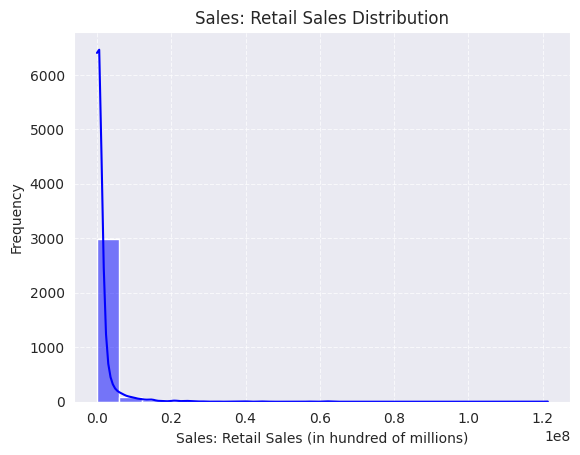

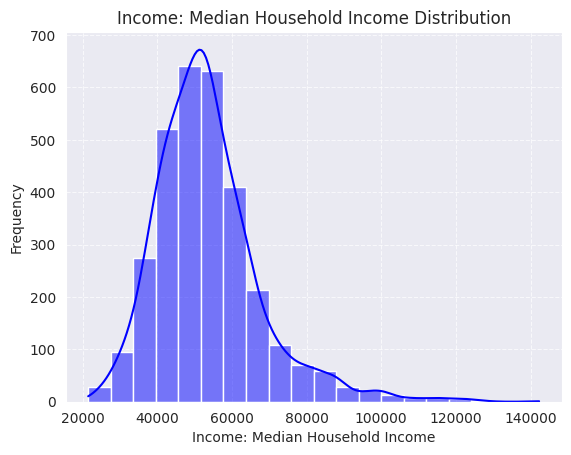

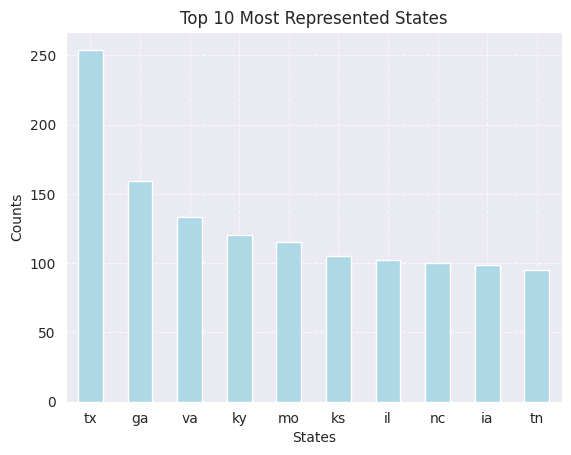

In [ ]:
sns.set_style("darkgrid")

# Creates a histogram for Low Access Numbers.People.10 Miles
sns.histplot(df['Low Access Numbers.People.10 Miles'], bins = 20, kde = True, color = 'blue')
plt.xlabel('Low Access Numbers: People at least 10 Miles')
plt.ylabel('Frequency')
plt.title('Low Access Numbers: People at least 10 Miles Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

# Creates a histogram for Vehicle Access.10 Miles
sns.histplot(df['Vehicle Access.10 Miles'], bins = 20, kde = True, color = 'blue')
plt.xlabel('Vehicle Access: at least 10 Miles')
plt.ylabel('Frequency')
plt.title('Vehicle Access: at least 10 Miles Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

# Creates a histogram for Sales.Retail Sales
sns.histplot(df['Sales.Retail Sales'], bins = 20, kde = True, color = 'blue')
plt.xlabel('Sales: Retail Sales (in hundred of millions)')
plt.ylabel('Frequency')
plt.title('Sales: Retail Sales Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

# Creates a histogram for Income.Median Houseold Income
sns.histplot(df['Income.Median Houseold Income'], bins = 20, kde = True, color = 'blue')
plt.xlabel('Income: Median Household Income')
plt.ylabel('Frequency')
plt.title('Income: Median Household Income Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

# Creates a bar chart for the State column
df['State'].value_counts().head(10).plot(kind = 'bar', color = 'lightblue')
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Top 10 Most Represented States')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()


Most of the selected numerical columns are right skewed, with the exception of  `Income: Median Household Income` having an approximately normal distribution. This is important to know in case we consider a model that makes assumptions about the distributions of its predictor variables.

The skewed distributions have a high peak at 0, suggesting most of the columns values consist of 0.

# Bivariate Analysis

---



*   Explore the relationship between two variables



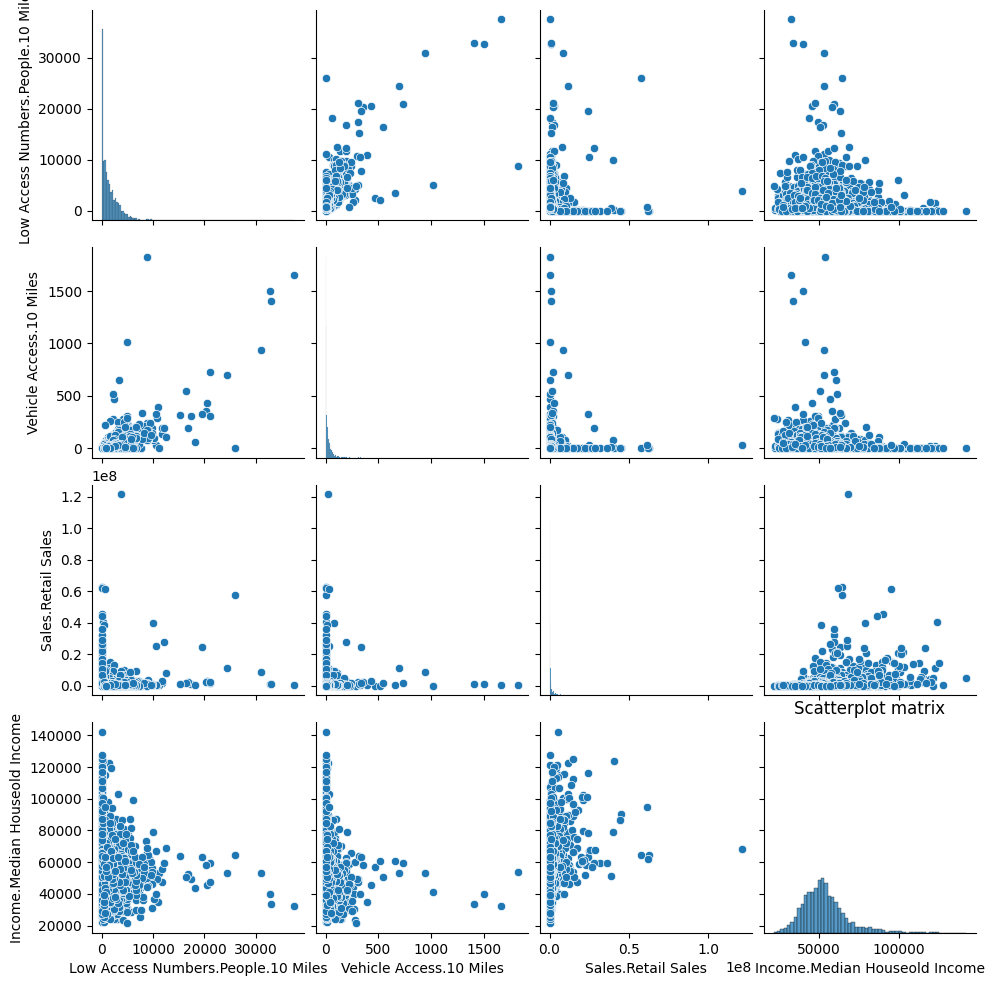

In [ ]:
# Pairwise plot of only numerical columns
sns.pairplot(df)
plt.show()

In [ ]:
# Correlation matrix for only numerical columns
df.select_dtypes(include = ['number', 'float']).corr()

,Low Access Numbers.People.10 Miles,Vehicle Access.10 Miles,Sales.Retail Sales,Income.Median Houseold Income
Low Access Numbers.People.10 Miles,1.0000,0.7067,0.0228,-0.1253
Vehicle Access.10 Miles,0.7067,1.0000,-0.0221,-0.1306
Sales.Retail Sales,0.0228,-0.0221,1.0000,0.2976
Income.Median Houseold Income,-0.1253,-0.1306,0.2976,1.0000


After looking at the scatter plot and correlation matrix, there doesn't seem to be any evidence of a linear association between any of the other numerical variables besides `Vehicle Access.10 Miles` and `Low Access Numbers.People.10 Miles`. As the population count without Vehichle access within at least 10 miles increase, the population count within at least 10 miles increase.

`Low Access Numbers.People.10 Miles` and `Income.Median Houseold Income` seem like they have a quadratic relationship.

The same goes for `Vehicle Access.10 Miles` and `Income.Median Houseold Income`.

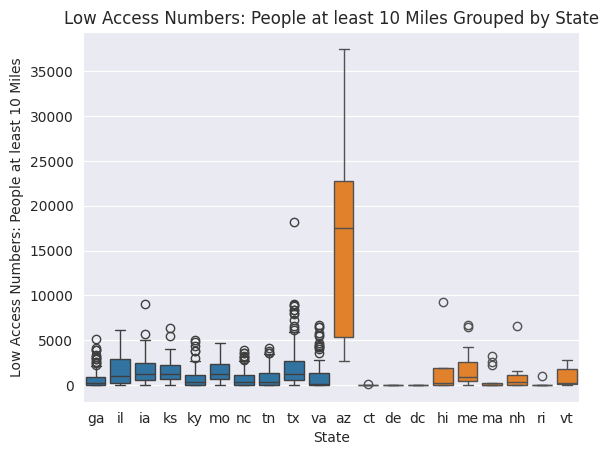

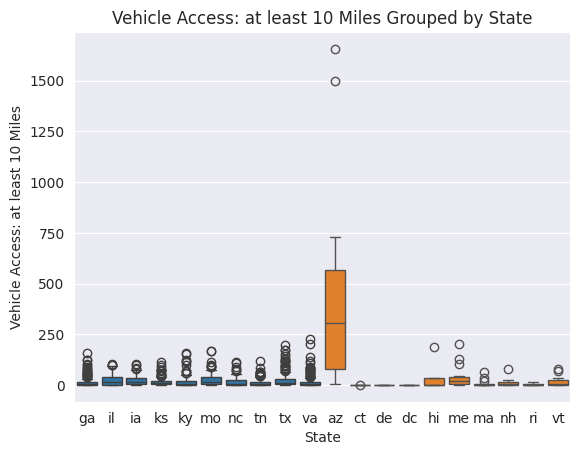

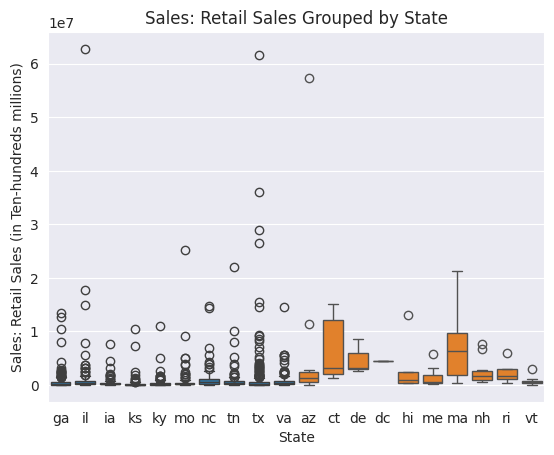

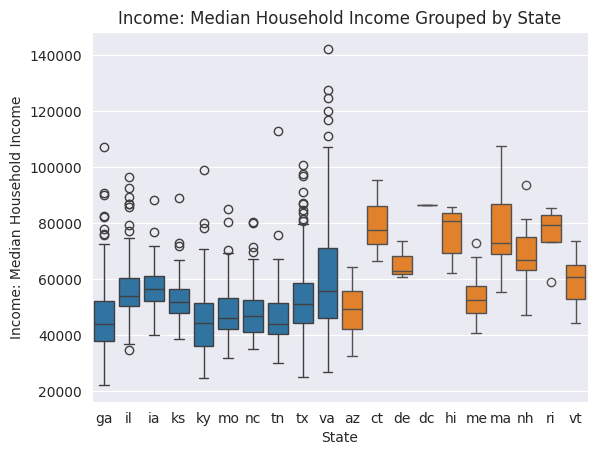

In [ ]:
top = df['State'].value_counts().head(10).index # Top 10 most represented States
bottom = df['State'].value_counts().tail(10).index # Bottom 10 most represented States

# Creates a boxplot for Low Access Numbers.People.10 Miles grouped by the top and bottom 10 represented States
sns.boxplot(x = 'State', y = 'Low Access Numbers.People.10 Miles', data = df[df['State'].isin(top)])
sns.boxplot(x = 'State', y = 'Low Access Numbers.People.10 Miles', data = df[df['State'].isin(bottom)])
plt.ylabel('Low Access Numbers: People at least 10 Miles')
plt.title('Low Access Numbers: People at least 10 Miles Grouped by State')
plt.show()

# Creates a boxplot for Vehicle Access.10 Miles grouped by the top and bottom 10 represented States
sns.boxplot(x = 'State', y = 'Vehicle Access.10 Miles', data = df[df['State'].isin(top)])
sns.boxplot(x = 'State', y = 'Vehicle Access.10 Miles', data = df[df['State'].isin(bottom)])
plt.ylabel('Vehicle Access: at least 10 Miles')
plt.title('Vehicle Access: at least 10 Miles Grouped by State')
plt.show()

# Creates a boxplot for Sales.Retail Sales grouped by the top and bottom 10 represented States
sns.boxplot(x = 'State', y = 'Sales.Retail Sales', data = df[df['State'].isin(top)])
sns.boxplot(x = 'State', y = 'Sales.Retail Sales', data = df[df['State'].isin(bottom)])
plt.ylabel('Sales: Retail Sales (in Ten-hundreds millions)')
plt.title('Sales: Retail Sales Grouped by State')
plt.show()

# Creates a boxplot for Income.Median Houseold Income grouped by the top and bottom 10 represented States
sns.boxplot(x = 'State', y = 'Income.Median Houseold Income', data = df[df['State'].isin(top)])
sns.boxplot(x = 'State', y = 'Income.Median Houseold Income', data = df[df['State'].isin(bottom)])
plt.ylabel('Income: Median Household Income')
plt.title('Income: Median Household Income Grouped by State')
plt.show()

In [ ]:
# Produces summary statistics for all numerical columns grouped by State
df.groupby('State').describe()

To simplify the visuals, I only showed the highest and lowest 10 represented States in the dataset.

The first graph reveals that among the states shown, Arizona (AZ), seems to have a large average of its population at least 10 miles from a supermarket. This trend could be visible in other states not shown. Suggesting that state may have an effect on the population count of low accessibility to a supermarket within 10 miles for a county. By effect, I mean that the population count of low acces within 10 miles may depend on state.

For the second graph, A similar pattern exists from the first graph. For all the states except Arizona, the boxplots are all relatively the same. This suggests that state may have an effect on vehicle accessbility at least 10 miles
from a supermarket for a county.

For the third graph, I would say that all the boxplots looks relatively the same. So there might not be a difference between groups.

For the fourth graph, There seems to be many differences in the grouped distrbutions. Suggesting that state may have an effect on Median house income for a county.

For all the graphs, it seems there is no constant variance between groups and no evidence of normality among all groups. This will be important to note.


## Multivariate Analysis

---


*   Explore the relationship between three or more variables




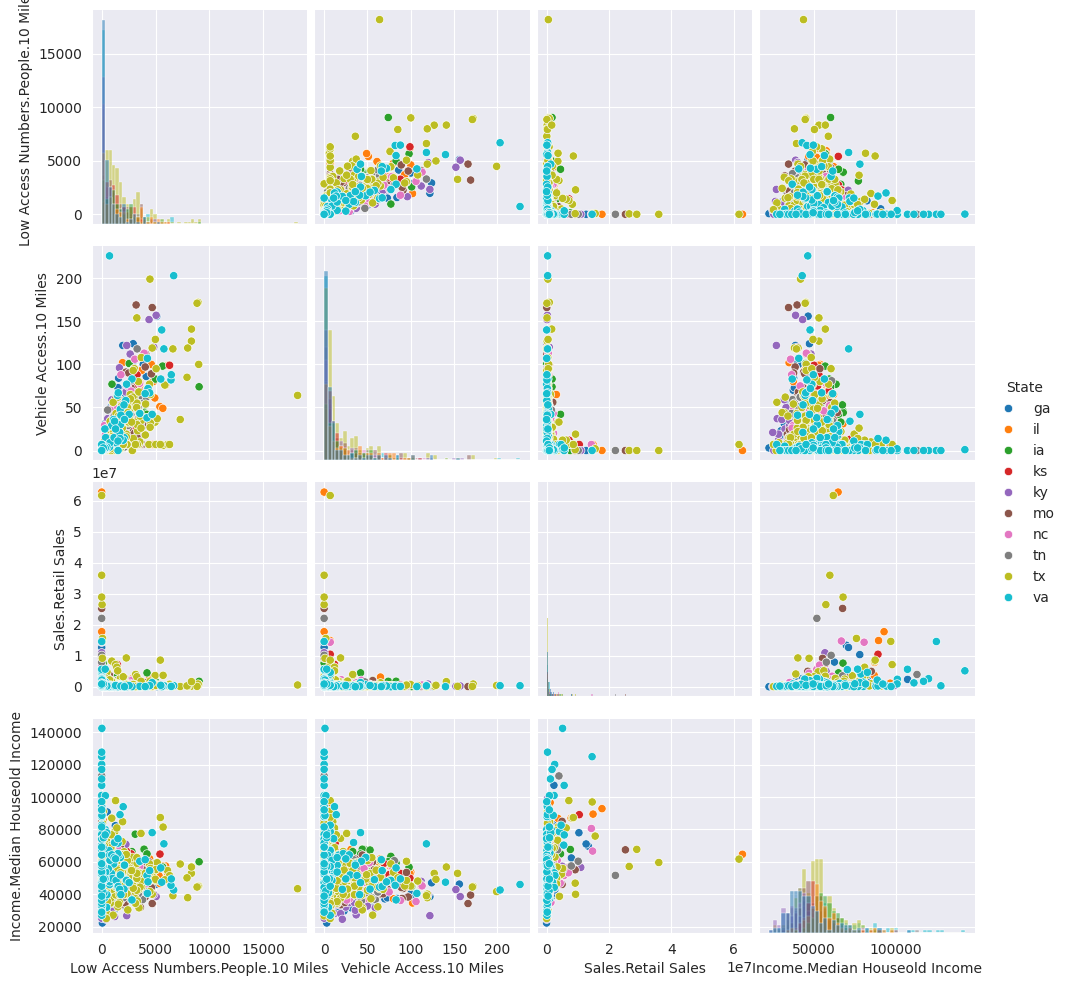

In [ ]:
# pairwise scatter plot of numerical columns grouped by top 10 represented States
sns.pairplot(df[df['State'].isin(top)], hue = 'State', diag_kind = 'hist')
plt.show()

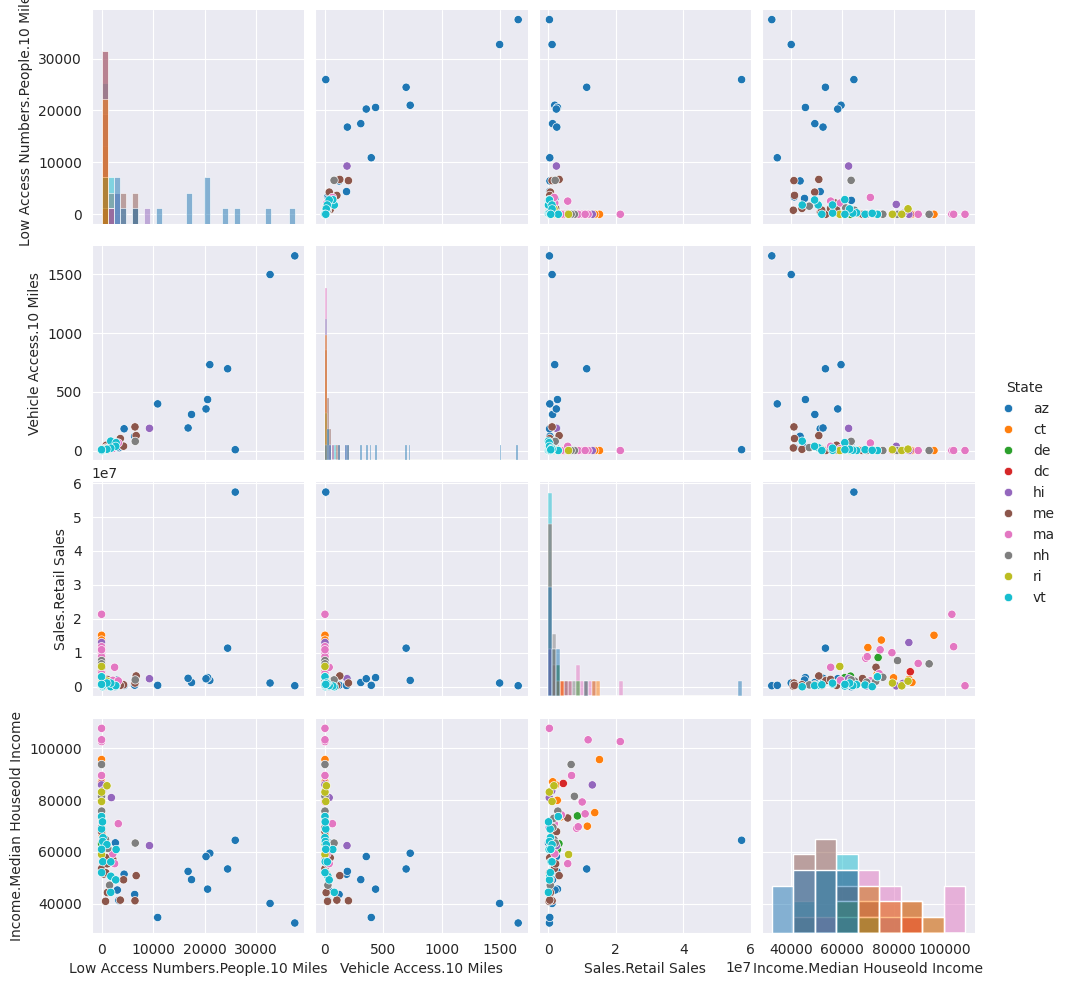

In [ ]:
# Produces a pariplot for all numerical columns grouped by the bottom 10 represented States
sns.pairplot(df[df['State'].isin(bottom)], hue = 'State', diag_kind = 'hist') # pairwise scatter plot of numerical columns grouped by bottom 10 represented States
plt.show()

After looking at the multivariate pairwise plots, it is likely that State has an effect on the relationship between  `Vehicle Access.10 Miles` and `Low Access Numbers.People.10 Miles` , `Low Access Numbers.People.10 Miles` and `Income.Median Houseold Income` and maybe `Vehicle Access.10 Miles` and `Income.Median Houseold Income` since I can see clear patterns in the coloring of points.

# Conclusion





A positive linear relationship may exist between Vehicle Access.10 Miles and Low Access Numbers.People.10 Miles, where state has an effect on the relationship. I will consider a multiple linear regression model with State and Vehicle Access.10 Miles as predictors.

A quadratic relationship may exist between Income.Median Houseold Income and Low Access Numbers.People.10 Miles, where state has an impact on the relationship. I will consider a polynomial regression model with State and Income.Median Houseold Income as predictors.